In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Gender"] = le.fit_transform(data["Gender"])

X_df= data.iloc[:,1:]


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X_df)


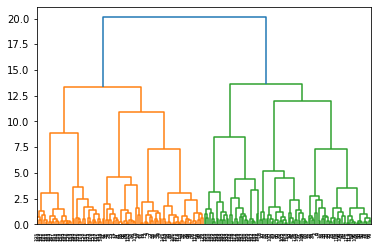

In [10]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method = "ward"))

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
linkage = ["ward", "complete", "average", "single"]
def hc_sonuc(linkage):
    
    for j in range(2,15):
        
        for i in linkage:
    
            hy = AgglomerativeClustering(n_clusters = j, affinity = 'euclidean', linkage=i)
            y = hy.fit_predict(X)
        
            print("{2} k sayında silhouette_score_{1}:  {0}".format(silhouette_score(X,y, metric='euclidean'),i,j))
            print('{2} k sayısında davies_bouldin_score_{1}: {0}'.format(str(davies_bouldin_score(X,y).round(3)),i,j))
            print("-------------------------------------")


"""
plt.scatter(X[y ==0,0], X[y==0,1], s = 20, c = "red")
plt.scatter(X[y ==1,0], X[y==1,1], s = 20, c = "blue")
plt.scatter(X[y ==2,0], X[y==2,1], s = 20, c = "yellow")"""

x = hc_sonuc(linkage)

2 k sayında silhouette_score_ward:  0.24177953745462927
2 k sayısında davies_bouldin_score_ward: 1.661
-------------------------------------
2 k sayında silhouette_score_complete:  0.1725985607018346
2 k sayısında davies_bouldin_score_complete: 2.175
-------------------------------------
2 k sayında silhouette_score_average:  0.2776035125578272
2 k sayısında davies_bouldin_score_average: 1.612
-------------------------------------
2 k sayında silhouette_score_single:  0.2776035125578272
2 k sayısında davies_bouldin_score_single: 1.612
-------------------------------------
3 k sayında silhouette_score_ward:  0.24834537795671963
3 k sayısında davies_bouldin_score_ward: 1.451
-------------------------------------
3 k sayında silhouette_score_complete:  0.20792835320796477
3 k sayısında davies_bouldin_score_complete: 1.701
-------------------------------------
3 k sayında silhouette_score_average:  0.27789348707719236
3 k sayısında davies_bouldin_score_average: 1.27
-----------------------

In [12]:
from sklearn.metrics import davies_bouldin_score

from sklearn.metrics import silhouette_score

hy = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage="ward")
y_ = hy.fit_predict(X)
    
print("silhouette_score", silhouette_score(X,y_, metric='euclidean'))

print('Davies Bouldin Score:'+str(davies_bouldin_score(X,y_).round(3)))


silhouette_score 0.42517748630372254
Davies Bouldin Score:0.799


In [13]:

# map back clusters to dataframe

frame = pd.DataFrame(X_df)
frame['cluster'] = y_
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,9
3,0,23,16,77,8
4,0,31,17,40,9


In [14]:
avg_df = X_df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,24.565217,39.217391,59.652174
1,1,1,38.833333,86.388889,11.666667
2,2,1,55.840000,54.000000,46.960000
3,3,0,54.080000,53.240000,49.520000
4,4,0,27.960000,57.360000,47.120000
5,5,1,33.277778,87.111111,82.666667
6,6,0,32.190476,86.047619,81.666667
7,7,0,44.600000,92.333333,21.600000
8,8,0,25.461538,25.692308,80.538462
9,9,0,41.538462,26.538462,20.692308


<AxesSubplot:xlabel='cluster', ylabel='Gender'>

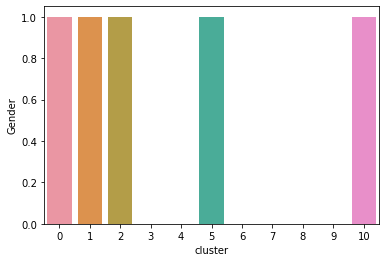

In [15]:
import seaborn as sns
sns.barplot(x='cluster',y='Gender',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Age'>

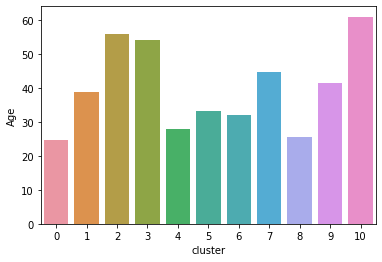

In [16]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

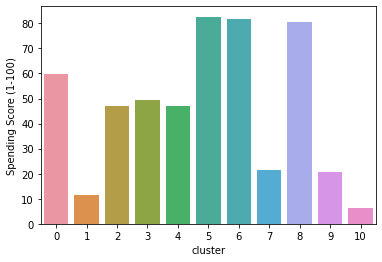

In [17]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

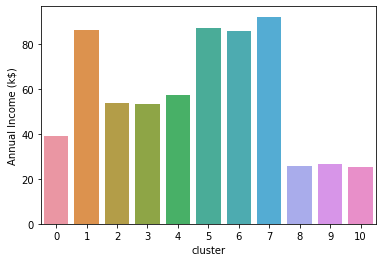

In [18]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)